<a href="https://colab.research.google.com/github/GuanRuLai/Python-Maching-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Import dataset

In [1]:
import os
if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

import pandas as pd
df = pd.read_csv("Salary_Data.csv")

## Split independent variables and dependent variable

In [3]:
import HappyML.preprocessor as pp

X, Y = pp.decomposition(dataset=df, x_columns=[i for i in range(1)], y_columns=[1])
print(X)
print(Y)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
      Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28 

## Handle missing data

In [4]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


## Split training set and testing set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

    YearsExperience
27              9.6
11              4.0
17              5.3
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0
    YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7
      Salary
27  112635.0
11   55794.0
17   83088.0
22  101302.0
5    56642.0
16   66029.0
8    64445.0
14   61111.0
23  113812.0
20   91738.0
1    46205.0
29  121872.0
6    60150.0
4    39891.0
18   81363.0
19   93940.0
9    57189.0
7    54445.0
25  105582.0
3    43525.0
0    39343.0
21   98273.0
15   67938.0
12   56957.0
      Salary
2    37731.0
28  12239

# Linear model processing

## Model training

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

## Model prediction

In [8]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]


## Visualising the training set results

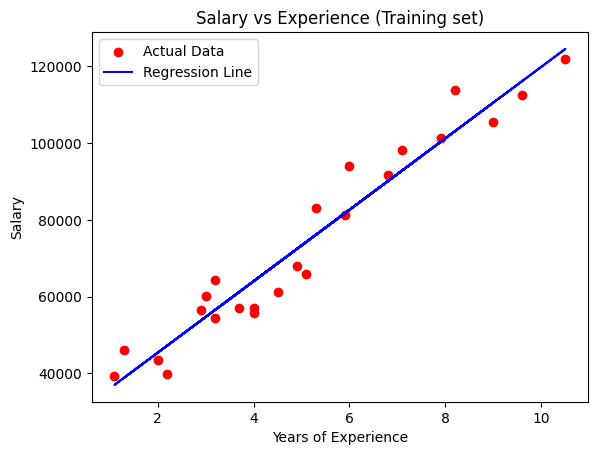

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color = 'red', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label='Regression Line')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the test set results

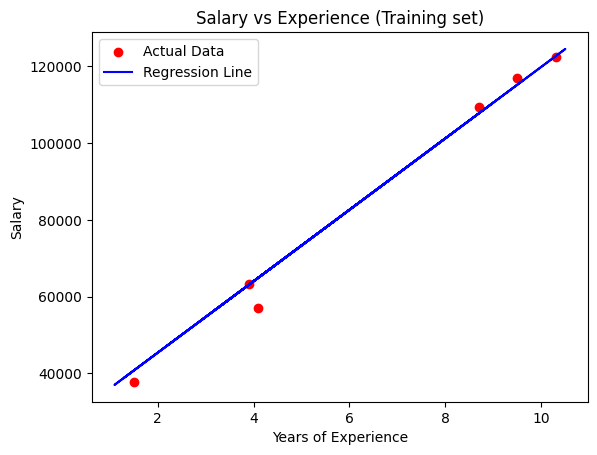

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color = 'red', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label='Regression Line')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Answer prediction

In [12]:
print(regressor.predict([[20]])) # The "predict" method always expects a 2D array as the format of its inputs.

[[213031.60168521]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Getting the final linear regression equation with the values of the coefficients

In [15]:
print(regressor.coef_)
print(regressor.intercept_)
# Salary = 9312.58 × YearsExperience + 26780.1

[[9312.57512673]]
[26780.09915063]
